#### Hi my name is Mark Chettiar and this is a data analysis Sales Report project, here i have used multiple libraries of python to work on this project, Hope you like my work...

In [61]:
import pandas as pd
listy = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
list1 = dict(Data1=' ', Data2=' ', Data3=' ', Data4=' ', Data5=' ', Data6=' ', Data7=' ', Data8=' ', Data9=' ', Data10=' ', Data11=' ')

for month, key in zip(listy, list1.keys()):        
    list1[key] = pd.read_csv("C:\\Users\\APPLE\\Downloads\\Sales_" + month + "_2019.csv")


In [62]:
lis = []
for i in list1.keys():
    lis.append( list1[i])
    
fulldf = pd.concat(lis)
print(fulldf)

      Order ID                   Product Quantity Ordered Price Each  \
0       141234                    iPhone                1        700   
1       141235  Lightning Charging Cable                1      14.95   
2       141236          Wired Headphones                2      11.99   
3       141237          27in FHD Monitor                1     149.99   
4       141238          Wired Headphones                1      11.99   
...        ...                       ...              ...        ...   
17656   295660    AAA Batteries (4-pack)                2       2.99   
17657   295661      USB-C Charging Cable                1      11.95   
17658   295662  Lightning Charging Cable                1      14.95   
17659   295663    AAA Batteries (4-pack)                1       2.99   
17660   295664              Google Phone                1        600   

             Order Date                       Purchase Address  
0        01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1    

In [63]:
# There are multiple same index in the dataframe so we have to create a new index 
'''print(fulldf.dtypes)
print(fulldf.tail())
print(fulldf.at[17660,'Order ID'])'''
fulldf.index = range(0,len(fulldf['Order ID']))
print(len(fulldf['Order ID']))
print(fulldf['Order ID'][161732])
# Now as you can see below in the index position 89118 we also have a string value which is causing error in the code so we have to fix that too
# the solution can be, we can insert null value wherever there is a string as we have written code to target the null value so that it will not cause any 
# trouble..

## Offcourse the functionality of the code given below can be simply achieved by using various function but i am sharpening my logic as it is
## my practice project later, in the other 5 columns we will use multiple function to simply achieve the same results...
for i in fulldf.index:
    prev = i-1
    nex = i+1
    kur = 0
    while kur == 0:
        try:
            int(fulldf.at[i,'Order ID'])
            kur = 1
        except:
            try:
                fulldf.at[i,'Order ID']=(int(fulldf.at[prev,'Order ID'])+int(fulldf.at[nex,'Order ID']))/2
                kur = 1
            except:
                print('hello')
                prev -= 1
                nex += 1
            
mark = fulldf['Order ID'][fulldf['Order ID'].isnull()]        
print(mark.index)

for i in mark.index:
    prev = i-1
    nex = i+1
    nur = 0
    while nur == 0:
        if (fulldf.at[prev,'Order ID'] and fulldf.at[nex,'Order ID']):
            fulldf.at[i,'Order ID']= (int(fulldf.at[prev,'Order ID'])+int(fulldf.at[nex,'Order ID']))/2
            nur = 1
        else:
            prev -= 1
            nex += 1
            
print(fulldf.tail())

161733
295664
hello
hello
Index([], dtype='int64')
       Order ID                   Product Quantity Ordered Price Each  \
161728   295660    AAA Batteries (4-pack)                2       2.99   
161729   295661      USB-C Charging Cable                1      11.95   
161730   295662  Lightning Charging Cable                1      14.95   
161731   295663    AAA Batteries (4-pack)                1       2.99   
161732   295664              Google Phone                1        600   

            Order Date                   Purchase Address  
161728  11/04/19 14:17  574 4th St, Los Angeles, CA 90001  
161729  11/23/19 07:22       359 1st St, Austin, TX 73301  
161730  11/13/19 16:12      900 10th St, Boston, MA 02215  
161731  11/17/19 17:08    592 Sunset St, Boston, MA 02215  
161732  11/17/19 16:13   428 Jackson St, Boston, MA 02215  


In [64]:
#below is the code for converting the first column to integer datatype so we can perform operations on it..
fulldf['Order ID']=fulldf['Order ID'].astype('int')
print(fulldf.dtypes)

Order ID             int32
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [65]:
# Now lets work on the third column lets try to convert it into integer and see what happens
# fulldf['Quantity Ordered']=fulldf['Quantity Ordered'].astype('int')
'''ValueError: cannot convert float NaN to integer (so we have to fix this error and to do so we cannot simply takes the average of the above and the
below value we have to apply group by on the basis of product and we can use median for the quantity ordered column to fill the nan values as there
can be outliers)'''
# creating a new dataframe newdf where only two columns remains from the table product and Quantity Ordered
newdf=fulldf[['Product','Quantity Ordered']]

# Now we will convert all the string value that is present in the column 'Quantity Ordered' and replace it with the value NAN thus the column will
# be converted to float64 datatype which we are permanently storing in the newdf dataframe...
newdf['Quantity Ordered']=pd.to_numeric(newdf['Quantity Ordered'],errors='coerce')

# Now in this dataframe we are removing all the rows which has NAN values
newdf.dropna(inplace = True)
print(newdf)

# Now we are converting the 'Quantity Ordered' column's float64 datatype to int64 datatype to perform median operations
newdf['Quantity Ordered']=newdf['Quantity Ordered'].astype('int')
groupbyobject = newdf.groupby('Product')
print(groupbyobject)

## Below dataframe named median is created which has median based on the product category so that we can replace all the NAN value in the original
## dataframe and place the corresponding median values to it
median = groupbyobject.median()
print(median)

## so here as we can see all the medians are 1 so we can replace all the missing value in the column 'Quantity Ordered' by NAN
# Now first we will convert all the string value in the original dataframe of the column named 'Quantity Ordered' into the value NAN..
fulldf['Quantity Ordered']=pd.to_numeric(fulldf['Quantity Ordered'],errors='coerce')
print(fulldf['Quantity Ordered'].dtypes)
fulldf['Quantity Ordered'].fillna(1, inplace= True)
fulldf['Quantity Ordered']=fulldf['Quantity Ordered'].astype('int')
print(fulldf.dtypes)
## HA HA i have successfully converted column 1 and 3 to int32 datatype later it will help when we will gather insights from the data.

                         Product  Quantity Ordered
0                         iPhone               1.0
1       Lightning Charging Cable               1.0
2               Wired Headphones               2.0
3               27in FHD Monitor               1.0
4               Wired Headphones               1.0
...                          ...               ...
161728    AAA Batteries (4-pack)               2.0
161729      USB-C Charging Cable               1.0
161730  Lightning Charging Cable               1.0
161731    AAA Batteries (4-pack)               1.0
161732              Google Phone               1.0

[160961 rows x 2 columns]
                            Quantity Ordered
Product                                     
20in Monitor                             1.0
27in 4K Gaming Monitor                   1.0
27in FHD Monitor                         1.0
34in Ultrawide Monitor                   1.0
AA Batteries (4-pack)                    1.0
AAA Batteries (4-pack)                   1.0
A

C:\Users\APPLE\AppData\Local\Temp\ipykernel_8676\2378812901.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Quantity Ordered']=pd.to_numeric(newdf['Quantity Ordered'],errors='coerce')
C:\Users\APPLE\AppData\Local\Temp\ipykernel_8676\2378812901.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(inplace = True)
C:\Users\APPLE\AppData\Local\Temp\ipykernel_8676\2378812901.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [66]:
#Now lets work with column number two
markop = fulldf[fulldf['Product'].isna()]
## Here as we can see all the row of the index does not have any value so we have to drop out such rows
fulldf=fulldf.drop(markop.index)
#print(fulldf['Purchase Address'][fulldf['Purchase Address'].isna()])
'''Now there is no nan values in any row'''
# now we can use a new index to create a nice number wise rows
fulldf.index = range(0,len(fulldf['Product']))
#print(fulldf.head(n=50))
#print(fulldf.sample(n=10))
## now we have to convert all the column's datatype to appropriate format to perform analysis
fulldf['Product']=fulldf['Product'].astype('str')
fulldf['Purchase Address']=fulldf['Purchase Address'].astype('str')
print(fulldf.dtypes)
# create a loop for string columns and elemenate all leading and trailing spaces in the string using loops upcoming...

Order ID             int32
Product             object
Quantity Ordered     int32
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [67]:
fulldf['Product']=fulldf['Product'].str.strip()
fulldf['Purchase Address']=fulldf['Purchase Address'].str.strip()
print(fulldf.tail())

        Order ID                   Product  Quantity Ordered Price Each  \
161263    295660    AAA Batteries (4-pack)                 2       2.99   
161264    295661      USB-C Charging Cable                 1      11.95   
161265    295662  Lightning Charging Cable                 1      14.95   
161266    295663    AAA Batteries (4-pack)                 1       2.99   
161267    295664              Google Phone                 1        600   

            Order Date                   Purchase Address  
161263  11/04/19 14:17  574 4th St, Los Angeles, CA 90001  
161264  11/23/19 07:22       359 1st St, Austin, TX 73301  
161265  11/13/19 16:12      900 10th St, Boston, MA 02215  
161266  11/17/19 17:08    592 Sunset St, Boston, MA 02215  
161267  11/17/19 16:13   428 Jackson St, Boston, MA 02215  


In [68]:
# lets works on Purchase Address column and seperate all three sub addresses
lis=fulldf['Purchase Address'].str.split(', ')

i = 0
mur = []
while i < len(lis):
    try:
        mur.append(lis[i][1])
        i += 1
    except:
        mur.append(pd.NA)
        i += 1
#print(mur)
fulldf['City']=mur
#print(fulldf['City'])
fulldf.dropna(subset = 'City',inplace = True)
fulldf.index = range(0,len(fulldf['Order ID']))
#fulldf
i = 0
mur = []
while i < len(lis):
    try:
        mur.append(lis[i][0])
        i += 1
    except:
        mur.append(pd.NA)
        i += 1
mur = pd.Series(mur)        
mur.dropna(inplace = True)
fulldf['Street']=mur
#fulldf 
i = 0
mur = []
while i < len(lis):
    try:
        mur.append(lis[i][2])
        i += 1
    except:
        mur.append(pd.NA)
        i += 1
mur = pd.Series(mur)        
mur.dropna(inplace = True)
fulldf['ZIP']=mur
fulldf
## Now the last and the toughest part is to work on Order Date column

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Street,ZIP
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston,944 Walnut St,MA 02215
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland,185 Maple St,OR 97035
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco,538 Adams St,CA 94016
3,141237,27in FHD Monitor,1,149.99,01-05-2019 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles,738 10th St,CA 90001
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin,387 10th St,TX 73301
...,...,...,...,...,...,...,...,...,...
160956,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",Los Angeles,251 Ridge St,NY 10001
160957,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",Austin,183 Highland St,GA 30301
160958,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",Boston,580 Lake St,CA 90001
160959,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",Boston,568 Park St,CA 94016


In [69]:
fulldf['Order Date']=pd.to_datetime(fulldf['Order Date'])
fulldf.dtypes
fulldf['Price Each']=fulldf['Price Each'].astype('float')
fulldf.dtypes
objofdatetime=pd.DatetimeIndex(fulldf['Order Date'])
fulldf['Time']=objofdatetime.time
fulldf['Year']=objofdatetime.year
fulldf['Month']=objofdatetime.month
fulldf['Day']=objofdatetime.day
fulldf['Hour']= objofdatetime.hour
fulldf.dtypes

## All the preparation of the table is successfully done... 

C:\Users\APPLE\AppData\Local\Temp\ipykernel_8676\3178909238.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fulldf['Order Date']=pd.to_datetime(fulldf['Order Date'])


Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
City                        object
Street                      object
ZIP                         object
Time                        object
Year                         int32
Month                        int32
Day                          int32
Hour                         int32
dtype: object

In [70]:
fulldf


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Street,ZIP,Time,Year,Month,Day,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,944 Walnut St,MA 02215,21:25:00,2019,1,22,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,185 Maple St,OR 97035,14:15:00,2019,1,28,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,538 Adams St,CA 94016,13:33:00,2019,1,17,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,738 10th St,CA 90001,20:33:00,2019,1,5,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,387 10th St,TX 73301,11:59:00,2019,1,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160956,295660,AAA Batteries (4-pack),2,2.99,2019-11-04 14:17:00,"574 4th St, Los Angeles, CA 90001",Los Angeles,251 Ridge St,NY 10001,14:17:00,2019,11,4,14
160957,295661,USB-C Charging Cable,1,11.95,2019-11-23 07:22:00,"359 1st St, Austin, TX 73301",Austin,183 Highland St,GA 30301,07:22:00,2019,11,23,7
160958,295662,Lightning Charging Cable,1,14.95,2019-11-13 16:12:00,"900 10th St, Boston, MA 02215",Boston,580 Lake St,CA 90001,16:12:00,2019,11,13,16
160959,295663,AAA Batteries (4-pack),1,2.99,2019-11-17 17:08:00,"592 Sunset St, Boston, MA 02215",Boston,568 Park St,CA 94016,17:08:00,2019,11,17,17


In [71]:
# Now lets answer some questions
'''Question 1 := What was the best month for sales?How much was earned that month?'''
#lets create a new column total profit which can be gathered by multipling the Quantity Ordered and Price Each column
fulldf['TotalProfit']=fulldf['Quantity Ordered']*fulldf['Price Each']
groupobj=fulldf.groupby('Month')
mo =groupobj['TotalProfit'].sum()
print(mo)
mo.sort_values(ascending = False)
'''Answer 1 := So the best month for sales was October and the total profit earned during that month was 3736726.88'''


Month
1     1813586.44
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12       2816.51
Name: TotalProfit, dtype: float64


'Answer 1 := So the best month for sales was October and the total profit earned during that month was 3736726.88'

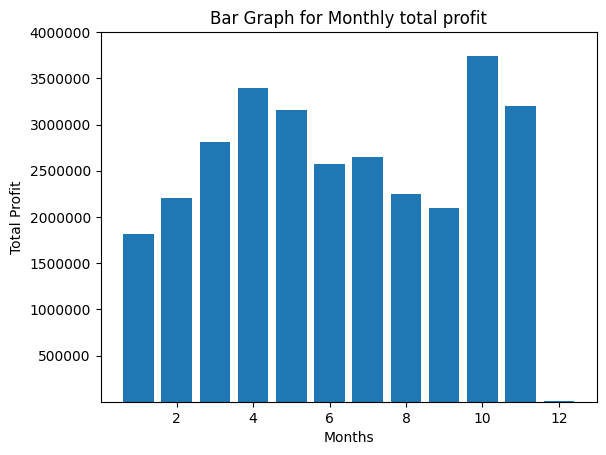

In [72]:

# Now lets vizualize the results
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('agg')  # Change to another backend if necessary
%matplotlib inline
plt.clf()
plt.bar(x=mo.index, height = mo);
plt.yticks(ticks = [500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],labels=[500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000]);
plt.xlabel('Months');
plt.ylabel('Total Profit');
plt.title('Bar Graph for Monthly total profit')
plt.show()

In [73]:
'''Question 2 what city sold the most product?'''
print(fulldf.groupby('City')['Quantity Ordered'].sum().idxmax())
''' as we can see the most number of product was sold in san francisco'''
print(fulldf.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False))
print(fulldf)

San Francisco
City
San Francisco    43453
Los Angeles      28916
New York City    24104
Boston           19499
Dallas           14430
Atlanta          14378
Seattle          14351
Portland         12194
Austin            9633
Name: Quantity Ordered, dtype: int32
        Order ID                   Product  Quantity Ordered  Price Each  \
0         141234                    iPhone                 1      700.00   
1         141235  Lightning Charging Cable                 1       14.95   
2         141236          Wired Headphones                 2       11.99   
3         141237          27in FHD Monitor                 1      149.99   
4         141238          Wired Headphones                 1       11.99   
...          ...                       ...               ...         ...   
160956    295660    AAA Batteries (4-pack)                 2        2.99   
160957    295661      USB-C Charging Cable                 1       11.95   
160958    295662  Lightning Charging Cable           

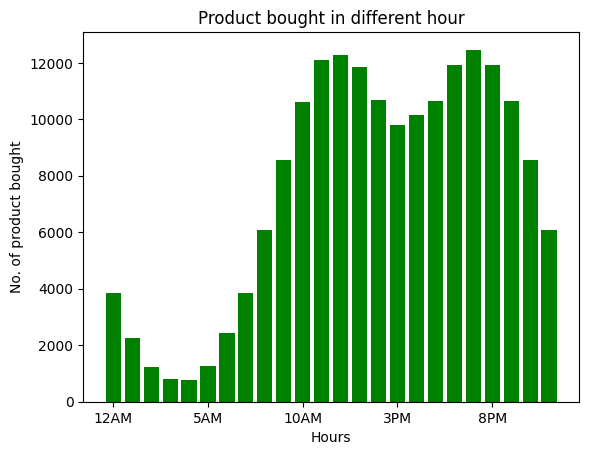

In [74]:
'''Question 3 What time should we display advertisements to maximize likelihood of customer buying product?'''
newd = fulldf.groupby('Hour')['Quantity Ordered'].sum().sort_values(ascending = False)
''' as you can see below the most number of product was brought at around 7:00PM displaying advertisement around that time would be great '''
plt.bar(newd.index,newd,color = 'green');
plt.xlabel('Hours');
plt.ylabel('No. of product bought');
plt.title('Product bought in different hour');
plt.xticks(ticks = [0,5,10,15,20],labels=['12AM','5AM','10AM','3PM','8PM']);

'as you can see, the distribution below given is skewed towards right that means usually when the price of the product is low quantity ordered is high\nand vice versa'

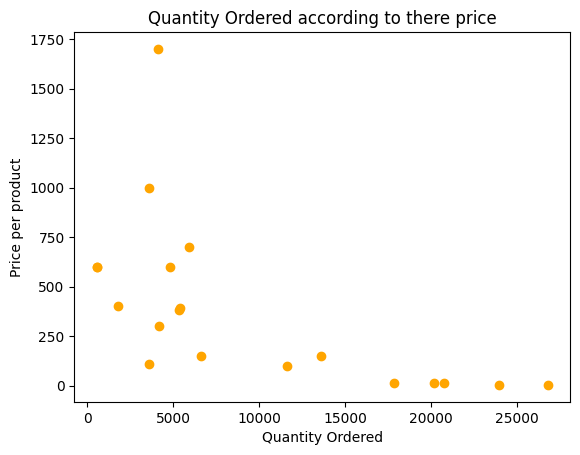

In [75]:
''' Question 4 = What product was sold the most? why did you think it did?'''
QuantityOrdered = fulldf.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)
'''AAA Batteries (4-pack)was sold the most'''
PriceEach = fulldf.groupby('Product')['Price Each'].mean().sort_values(ascending = True)
'''Now as you can see AAA Batteries are the cheapest for each unit the price is even less then the AA Batteries that is the
reason why it is sold the most'''
PriceEach = PriceEach.reindex(QuantityOrdered.index)
concated = pd.concat([QuantityOrdered, PriceEach], axis = 1)
#print(concated)
plt.scatter(concated['Quantity Ordered'],concated['Price Each'],color='orange');
plt.xlabel('Quantity Ordered');
plt.ylabel('Price per product');
plt.title('Quantity Ordered according to there price');
'''as you can see, the distribution below given is skewed towards right that means usually when the price of the product is low quantity ordered is high
and vice versa'''